*Part 2: Python for Data Analysis IV*
# Analysing and Plotting#

In the last tutorial we got to know some useful functions and methods to import, inspect, clean and export data.

The main focus of this tutorial will be on how to **analyze and visualize data**. For this purose we will get to know two new Python libraries: **statsmodels** and **matplotlib**.



## Getting help

In this class we will not be able to cover all aspects of Python. If you want more details, you can consult, for example, the **Python Standard Library Reference** at https://docs.python.org/3/library/ or the **Language Reference** at https://docs.python.org/3/reference/. But be warned: the amount of detail in these sources can be overwhelming. For **quick and easy-to-understand overviews** of different topics see, for example, https://www.w3schools.com/python/. Here are some specific references for today's tutorial:

*  Pandas: https://www.w3schools.com/python/pandas/default.asp
*  Statsmodels: https://www.statsmodels.org/stable/user-guide.html
*  Matplotlib: https://www.w3schools.com/python/matplotlib_pyplot.asp
*  Merging: https://pandas.pydata.org/docs/user_guide/merging.html


If you get stuck or don't remember how to do something, it is usually a good idea to **Google** your problem. Python has a large (and fast-growing) community and you will probably find answers to most of your questions online (e.g. on **Stack Overflow** or in a **Youtube tutorial**).

## Getting started

Again, we will work with the following datasets:

* ``life_satisfaction_clean.csv``
* ``trust_clean.csv``
* ``real-gdp-per-capita-clean.csv``

You can find them in the following folder: https://drive.google.com/drive/folders/1QnHTDQ0tb8_Ex6dMgNCwqJuL3PxzEKIv

Copy them to an appropriate folder on your computer or your Google Drive so you can follow along with the tutorial. Let's import the modules we will use, mount our drive, change our working directory and load in the data:

In [2]:
import pandas as pd
import numpy as np
import os

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
os.chdir("/content/drive/MyDrive/MyData")

In [ ]:
satisfaction = pd.read_csv("life_satisfaction_clean.csv", index_col="country")
trust = pd.read_csv("trust_clean.csv", index_col="country_code")
gdp = pd.read_csv("real-gdp-per-capita-clean.csv")

In [ ]:
gdp

,country,code,year,gdp_per_capita
0,Albania,ALB,1970,2828.0728
1,Albania,ALB,1971,2869.7212
2,Albania,ALB,1972,2919.5935
3,Albania,ALB,1973,2968.1025
4,Albania,ALB,1974,3024.6765
...,...,...,...,...
9980,Zimbabwe,ZWE,2013,1881.8159
9981,Zimbabwe,ZWE,2014,1904.7742
9982,Zimbabwe,ZWE,2015,1847.6211
9983,Zimbabwe,ZWE,2016,1821.6588


If you didn't succeed to load the files, run the following lines of code to load them:

In [5]:
satisfaction = pd.read_csv("http://farys.org/daten/life_satisfaction_clean.csv",
                           index_col="country")

trust = pd.read_csv("http://farys.org/daten/trust_clean.csv",
                    index_col="country_code")

gdp = pd.read_csv("http://farys.org/daten/real-gdp-per-capita-clean.csv")

## Analyzing data


Up to now we saw how to compute descriptive statistics of single variables, such as the mean or the median. Of course, Python can also be used for more advanced data analyses such as regression modelling or hypothesis testing.

A convenient module for classical data analysis is the `statsmodels` module. We will only scratch the surface; see https://www.statsmodels.org/stable/user-guide.html for full documentation.

There are different ways how you can work with the module; you can work with it in an elementary style using `numpy` arrays, or you can use it with `pandas` dataframes and R-style syntax for regression models. For the latter, load the `statsmodels.formula.api` module:


In [7]:
import statsmodels.formula.api as smf

><font color = 4e1585> SIDENOTE: The focus of `statsmodels.formula.api` is on regression models and it only provides access to a fraction of the functionality of `statsmodels`. Use
```python
import statsmodels.api as sm
```
<font color = 4e1585> to get access to many additional models, statistics, and tools.

Let's now analyze how life satisfaction is related to other variables in our `satisfaction` dataset. We start with a simple linear regression of life satisfaction on per capita income (we use the logarithm of income in accordance with economic theory on declining marginal utility).

The `ols()` function can be used to define the model:

In [9]:
model = smf.ols("life_satisfaction ~ np.log(gni_per_capita)", data=satisfaction)

><font color = 4e1585> SIDENOTE: See https://www.statsmodels.org/stable/example_formulas.html for information on how to specify the regression formula.

We can then use the `fit()` method to fit the model:

In [11]:
results = model.fit()

Finally, use the `summary()` method to look at the results:

In [12]:
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:      life_satisfaction   R-squared:                       0.687
Model:                            OLS   Adj. R-squared:                  0.684
Method:                 Least Squares   F-statistic:                     271.7
Date:                Tue, 27 Jun 2023   Prob (F-statistic):           4.89e-33
Time:                        12:02:48   Log-Likelihood:                -117.54
No. Observations:                 126   AIC:                             239.1
Df Residuals:                     124   BIC:                             244.8
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                             coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------
Intercept                  0

We see that average life satisfaction is signficantly related to per capita income (t value of 16!). The slope coefficient of 0.6255 means that life satisfaction increased by about  0.6255 * ln(2) = 0.43 points if per capita income is doubled.

><font color = 4e1585> SIDENOTE: Of course, we can also do all of the above in one step if we are just interested in displaying the results:
>```python
>smf.ols('life_satisfaction ~ np.log(gni_per_capita)', data=satisfaction).fit().summary()
```

> <font color = 4e1585> SIDENOTE: For heteroscedasticity-robust standard errors you can type `fit(cov_type="HC1")`.

Let's extend the model by adding working hours as an additional predictor:

In [14]:
model2 = smf.ols("life_satisfaction ~  np.log(gni_per_capita) + workhours",
                 data=satisfaction)
print(model2.fit().summary())

                            OLS Regression Results                            
Dep. Variable:      life_satisfaction   R-squared:                       0.709
Model:                            OLS   Adj. R-squared:                  0.699
Method:                 Least Squares   F-statistic:                     69.47
Date:                Tue, 27 Jun 2023   Prob (F-statistic):           5.21e-16
Time:                        12:03:33   Log-Likelihood:                -43.294
No. Observations:                  60   AIC:                             92.59
Df Residuals:                      57   BIC:                             98.87
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                             coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------
Intercept                  1

The effect of per capita income did not change much and the effect of working hours does not appear to be significant. However, note that the number of observations is now much smaller (60 compared to 126). This is because `workhours` has lots of missings. Observations with missings on one of the variables are automatically excluded by `ols()`.

It is also easily possible to use categorical data as predictors, as well as interaction effects.

In [16]:
model3 = smf.ols("life_satisfaction ~  np.log(gni_per_capita) * continent",
                 data=satisfaction)
print(model3.fit().summary())

                            OLS Regression Results                            
Dep. Variable:      life_satisfaction   R-squared:                       0.763
Model:                            OLS   Adj. R-squared:                  0.740
Method:                 Least Squares   F-statistic:                     33.38
Date:                Tue, 27 Jun 2023   Prob (F-statistic):           1.28e-30
Time:                        12:04:16   Log-Likelihood:                -99.924
No. Observations:                 126   AIC:                             223.8
Df Residuals:                     114   BIC:                             257.9
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
                                                        coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------

Various other types of models are supported by `statsmodels`. For example, we could fit logistic regressions, count data models, mixed-effects models, and many more.

## Plotting data

Let's now take a brief look at data vizualization. A widely used module for plotting in Python is the ``pyplot`` module from the ``matplotlib`` package. Let's import it:

In [17]:
import matplotlib.pyplot as plt

We will take a look at lineplots, barplots and scatter plots and learn how to do some simple customizations (adding axis labels, changing colors etc.). Apart from the things we will cover, there are countless additional plots and customizations you can do with ``matplotlib``.  Take a look at the documentation or at some code examples to find out:

*   Documentation: https://matplotlib.org/stable/api/pyplot_summary.html
*    Examples: https://matplotlib.org/stable/gallery/index.html


### Line plots

We will start with a line plot. Suppose you would like to plot the GDP over time for some countries (say, Switzerland, China and Tanzania). Let's take a look at the GDP data:

In [18]:
gdp.head()

,country,code,year,gdp_per_capita
0,Albania,ALB,1970,2828.0728
1,Albania,ALB,1971,2869.7212
2,Albania,ALB,1972,2919.5935
3,Albania,ALB,1973,2968.1025
4,Albania,ALB,1974,3024.6765


We now can create datasets containing yearly GDP for some countries:

In [22]:
# Create a dataset per country
che = gdp.loc[gdp["country"] == "Switzerland"]
tza = gdp.loc[gdp["country"] == "Tanzania"]
chn = gdp.loc[gdp["country"] == "China"]

# Look at an example dataframe
che.head()

,country,code,year,gdp_per_capita
8662,Switzerland,CHE,1950,14172.437
8663,Switzerland,CHE,1951,15209.594
8664,Switzerland,CHE,1952,15015.441
8665,Switzerland,CHE,1953,15410.788
8666,Switzerland,CHE,1954,16279.411


Let's now plot the data for Switzerland. We can use the ``plot`` function:

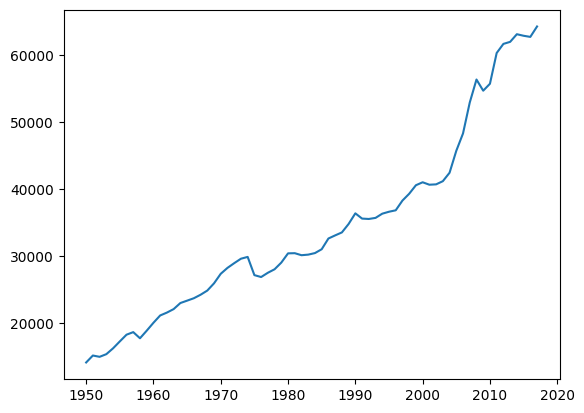

In [24]:
plt.plot(che["year"], che["gdp_per_capita"])
# plt.plot("year", "gdp_per_capita", data = che) # works as well

In its simplest form, the **``plot`` function works as follows**:

* ``plt.plot(``*x*``,`` *y*``)``

*x* and *y* can be `pandas` Series (e.g. a columns in a pandas Dataframe), but also lists, indices or `numpy` arrays.



We can also **plot several lines** on top of each other:

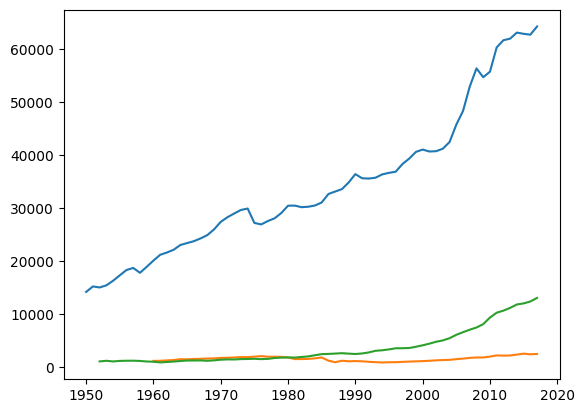

In [26]:
plt.plot(che["year"], che["gdp_per_capita"])
plt.plot(tza["year"], tza["gdp_per_capita"])
plt.plot(chn["year"], chn["gdp_per_capita"])

You can easily add more information such as a ``title``, axis labels (``xlabel`` and ``ylabel``), a ``legend`` or a ``grid`` to your plot:

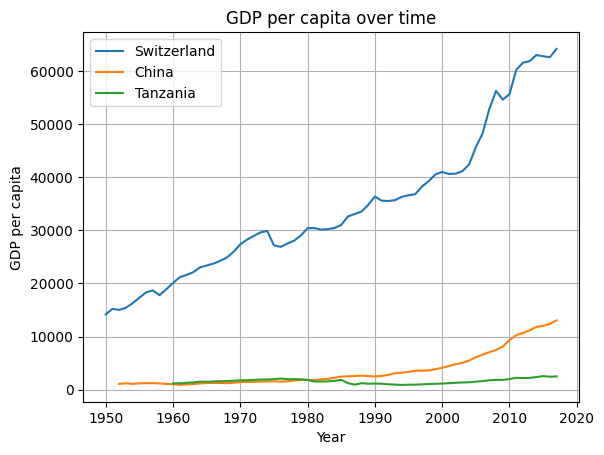

In [29]:
# Plot country lines
plt.plot(che["year"], che["gdp_per_capita"])
plt.plot(chn["year"], chn["gdp_per_capita"])
plt.plot(tza["year"], tza["gdp_per_capita"])

# Add a title
plt.title("GDP per capita over time")

# Add axis labels
plt.ylabel("GDP per capita")
plt.xlabel("Year")

# Add legend
plt.legend(["Switzerland", "China", "Tanzania"])

# Add a grid
plt.grid()

><font color = 4e1585>SIDENOTE: There is a better (more robust) way of adding the legend:
>
>
>```
plt.plot(che["year"],che["gdp_per_capita"], label="Switzerland") # Add label
plt.plot(chn["year"],chn["gdp_per_capita"], label="China" )     # Add label
plt.plot(tza["year"],tza["gdp_per_capita"], label="Tanzania")   # Add label
>
># Add legend (labels will be taken automatically!)
plt.legend()
```




Moreover, you can customize the colors (``color`` parameter), line types (``linestyle``) or markers (``marker``), and much more:



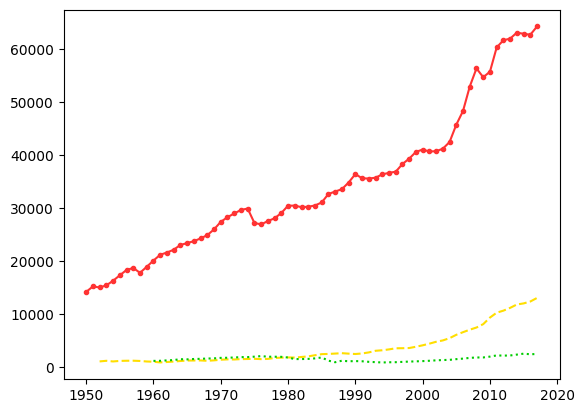

In [33]:
# Plot country lines
plt.plot(che["year"], che["gdp_per_capita"],
         color="#ff3333",
         marker="o", markersize=3)

plt.plot(chn["year"], chn["gdp_per_capita"],
         color="#ffde00",
         linestyle="dashed")

plt.plot(tza["year"], tza["gdp_per_capita"],
         color="#00cc00",
         linestyle="dotted")

To see what options you have, see, for example:

* Colors (hex codes): https://www.w3schools.com/colors/colors_picker.asp

* Line styles: https://matplotlib.org/stable/gallery/lines_bars_and_markers/linestyles.html

* Marker styles: https://matplotlib.org/stable/api/markers_api.html

You can also change the overall style of your plot, using ``style.use``:

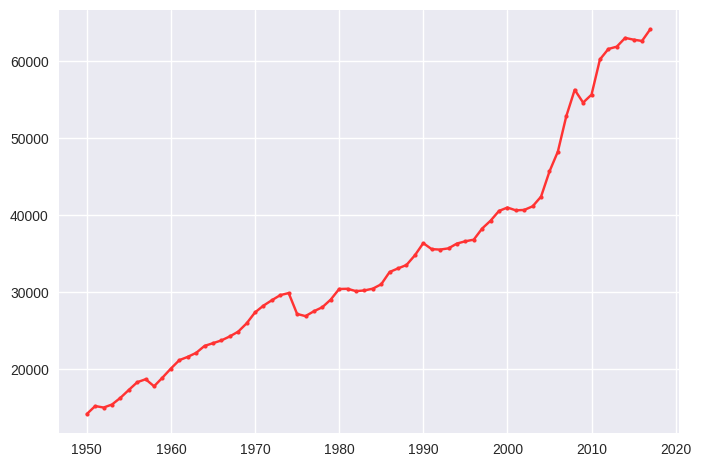

In [36]:
plt.style.use("seaborn-v0_8")
plt.plot(che["year"], che["gdp_per_capita"],
         color="#ff3333",
         marker="o", markersize=3)

An overview on all available styles can be found here: https://matplotlib.org/stable/gallery/style_sheets/style_sheets_reference.html

For the documentation on the ``plot`` function, see: https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.plot.html

### Bar plots

If you want your data to be displayed as a bar rather than a line plot, you can use ``plt.bar``. Let's plot the average trust values by continent:

<BarContainer object of 6 artists>

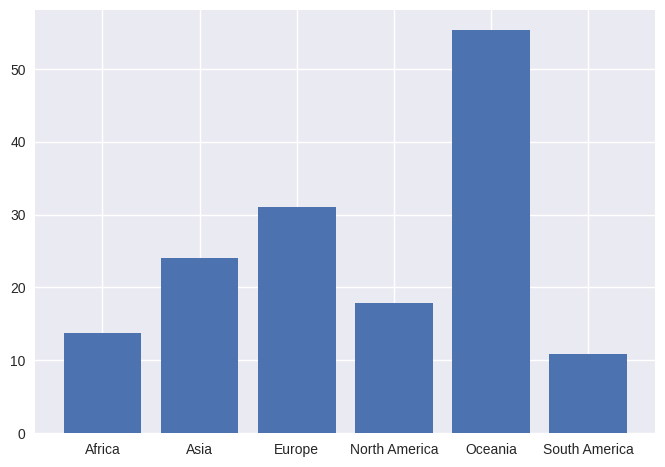

In [39]:
# Create dataset with average trust values by continent
trust_agg = trust.groupby("continent").mean(numeric_only=True)
trust_agg
# Make bar plot
plt.bar(trust_agg.index, trust_agg["trust"])

This does not look very good. Let's use ``barh`` to create a horizontal plot instead:

Text(0.5, 0, 'Share of people who think others can be trusted')

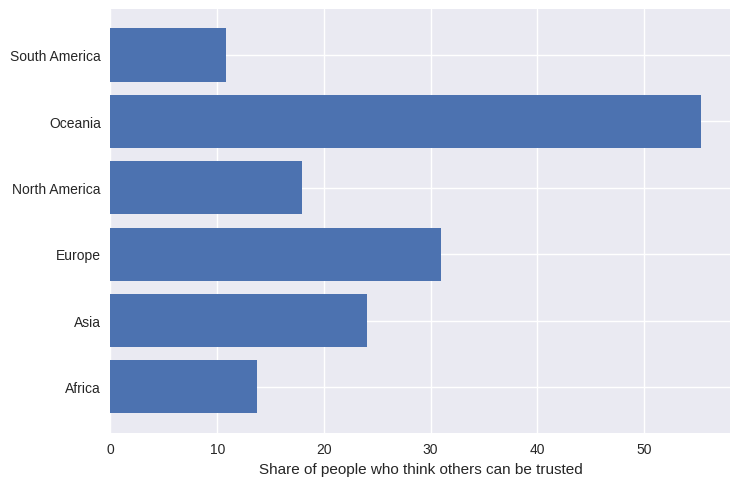

In [41]:
plt.barh(trust_agg.index, trust_agg["trust"])
plt.xlabel("Share of people who think others can be trusted")

For the documentation on the ``bar`` function, see: https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.bar.html

### Scatter plots

You are interested in the relationship between life satisfaction and income. Let's make a scatter plot to explore this relationship. You can use the ``scatter`` function:

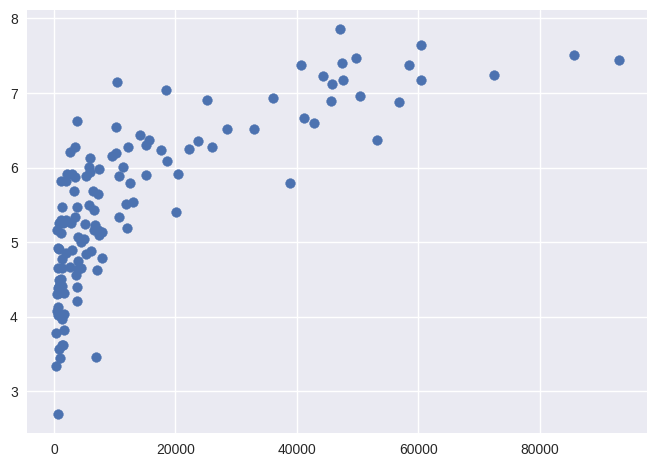

In [43]:
plt.scatter(satisfaction["gni_per_capita"],
            satisfaction["life_satisfaction"])

You can also combine different types of plots. Let's **add a regression line** to our plot:

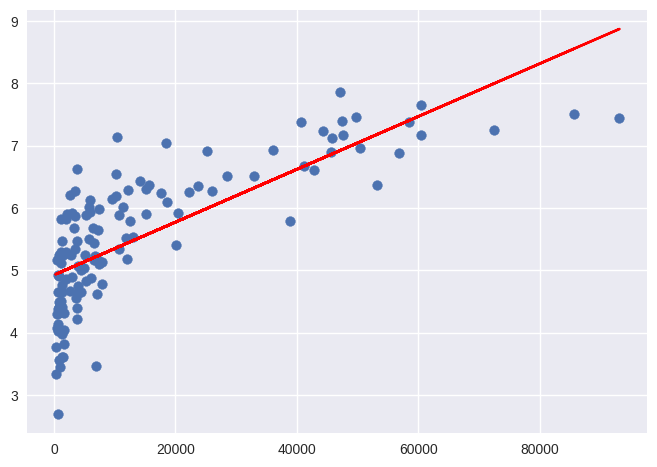

In [46]:
# Define variables
x = satisfaction["gni_per_capita"]
y = satisfaction["life_satisfaction"]

# Make scatter plot
plt.scatter(x, y)

# Add regression line
b1, b0 = np.polyfit(x, y, 1)  # Estimate slope and intercept
plt.plot(x, b1*x + b0, color="red")  # Plot line

For the documentation ond scatter plots, see: https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.scatter.html

### Customization example: Bubble plot*

Let's now try to do some customizations to create a scatter plot that looks (a bit) like this one: https://www.gapminder.org/tools/#$chart-type=bubbles&url=v1. Let's start by making the sizes of the dots proportional to the population. We can use the ``s`` parameter to do this:

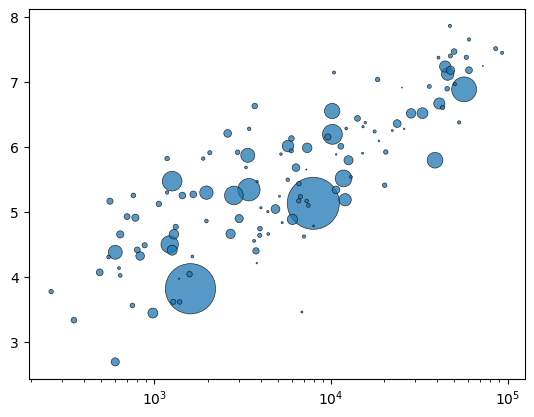

In [53]:
# Change back to default style
plt.style.use("default")

# Sort values by population (so larger bubbles go to the back)
satisfaction.sort_values("population", inplace=True, ascending=False)

# Plot values with bubble size proportional to population
plt.scatter(satisfaction["gni_per_capita"], satisfaction["life_satisfaction"],
            s=satisfaction["population"]/1000000,  # Make bubble size proportional to population size
            edgecolor="black", linewidth=0.5,  # Change edgecolor and linesize of bubbles
            alpha=0.75)  # Make bubbles slightly transparent

# Log-scale for x axis
plt.xscale("log")

Adding the colors is a bit trickier. You have to provide a Series (or list) with all the colors as an argument to the ``c`` parameter. Let's create a column with the colors:

In [61]:
# Simplify to 5 continents
satisfaction["continent"].replace({"North America": "America",
                                   "South America": "America"},
                                  inplace=True)

# Define color dictionary
colors = {'Asia': "red", 'Europe': "yellow", 'Africa': "blue",
          'America': "green", 'Oceania': "violet"}

# Use the map function the create a column with the colors
satisfaction["colors"] = satisfaction["continent"].map(colors)

Now we can create a plot where each country is colored according to the continent:

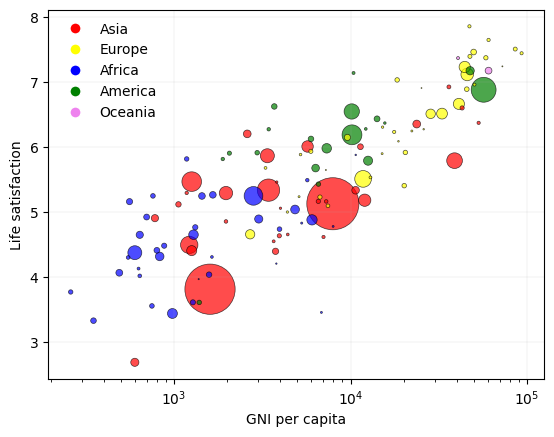

In [74]:
# Create plot
plt.scatter(satisfaction["gni_per_capita"], satisfaction["life_satisfaction"],
            s=satisfaction["population"]/1000000,
            edgecolor="black", linewidth=0.5,
            alpha=0.7,
            c=satisfaction["colors"])  # Color

# Log-scale for x axis
plt.xscale("log")

# Add grid
plt.grid(alpha=0.6, linewidth=0.2)

# Add axis labels
plt.xlabel("GNI per capita")
plt.ylabel("Life satisfaction")

# Add legend
from matplotlib.lines import Line2D

legend_elements = []
for key, value in colors.items():
    legend_elements.append(Line2D([0], [0], marker="o", color="white",
                                  markerfacecolor=value, markersize=8, label=key))


plt.legend(handles=legend_elements, frameon=False)

In [75]:
colors.keys()

dict_keys(['Asia', 'Europe', 'Africa', 'America', 'Oceania'])

### Exporting plots

To export a plot, you can use the ``savefig`` function after creating the plot:

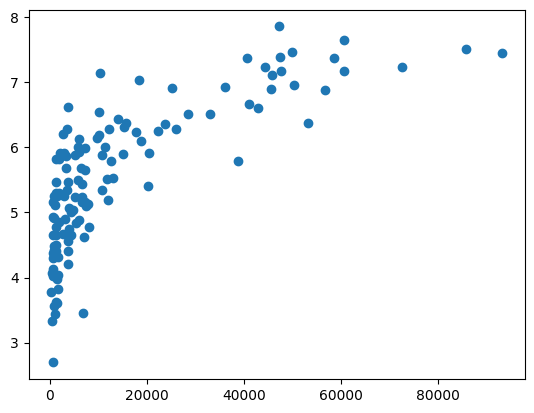

In [78]:
# Make a plot
plt.scatter(satisfaction["gni_per_capita"], satisfaction["life_satisfaction"])

# Export the plot
plt.savefig("myplot.pdf")  # as pdf
plt.savefig("myplot.png")  # as png



---


>  <font color='teal'> **In-class exercise**:
Consider the following two datasets:

In [81]:
ind = gdp.loc[gdp["country"] == "India"]
jpn = gdp.loc[gdp["country"] == "Japan"]

>  <font color='teal'> Plot the evolution of the gdp for India and Japan. Add a legend to your plot.

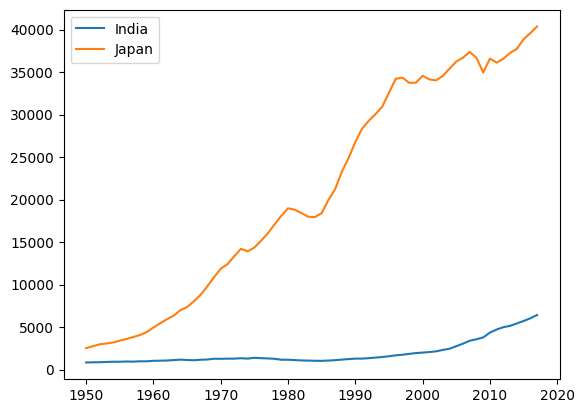

In [84]:
ind.head()

plt.plot("year", "gdp_per_capita", data=ind, label="India")
plt.plot("year", "gdp_per_capita", data=jpn, label="Japan")
plt.legend()

>  <font color='teal'> Using the ``satisfaction`` dataset, make a scatter plot to explore the relationship between income and workhours. Label the axes of your plot.

Text(0, 0.5, 'Avg. income')

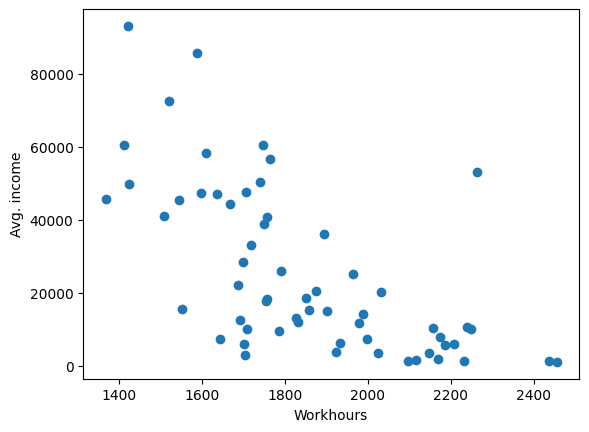

In [86]:
satisfaction.head()
plt.scatter("workhours", "gni_per_capita", data=satisfaction)
plt.xlabel("Workhours")
plt.ylabel("Avg. income")

## Object-oriented plotting

There are two very different approaches to plotting with matplotlib. So far, we have seen the so-called **functional approach** (also called procedural or implicit). This means that we have used the functions provided in ``matplotlib.pyplot`` (e.g., ``plt.title()``) to create and customize our plots.

There is also an **object-oriented approach** (also called explicit) to plotting with matplotlib. It allows us to create plot objects, assign them to variables, and then apply methods to these objects. In general, it is recommended to use the object-oriented interface as it allows you to customize your plots more flexibly. So let's have a look at it.

We can use the ``subplots()`` function to initialize the objects we want to work with. These are a ``Figure`` object (by convention named ``fig``) and one or several ``Axes`` objects (usually named ``ax`` or ``axes``). You can think of the **figure object as the container for your plot(s)** and the **axes object(s) as the actual plot(s)** (not to be confused with the x-, or y-axis of a plot!!).

Let's create a figure with one axis (i.e. one subplot):

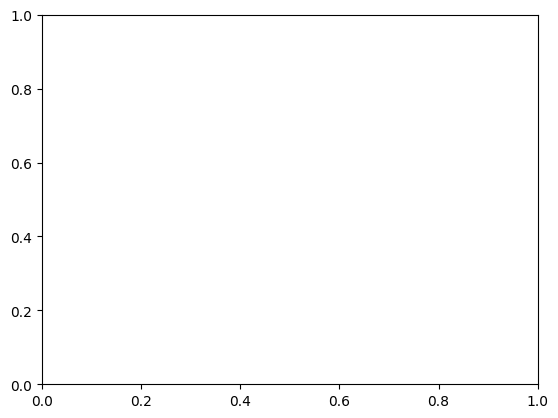

In [89]:
fig, ax = plt.subplots()

In [91]:
print(fig)  # fig object (instance of Figure class defined in matplotlib)
print(ax)   # ax object (instance of Axes class defined in matplotlib)

Figure(640x480)
Axes(0.125,0.11;0.775x0.77)


Now we can **apply some methods to the objects we created**. As ``ax`` refers to the actual plot, most methods need to be applied to ``ax``:

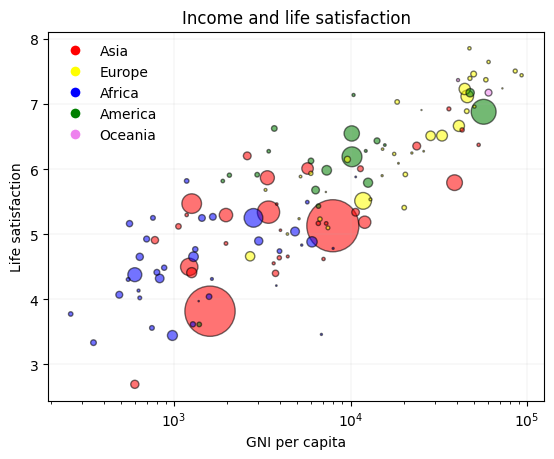

In [96]:
# Initialize fig and ax objects
fig, ax = plt.subplots()

# fill ax with a scatter plot
ax.scatter(satisfaction["gni_per_capita"],
           satisfaction["life_satisfaction"],
           marker="o",
           edgecolor="black",
           c=satisfaction["colors"],
           s=satisfaction["population"]/1000000,
           alpha=0.55)

# Add a title
ax.set_title("Income and life satisfaction")

# Add axis labels
ax.set_ylabel("Life satisfaction")
ax.set_xlabel("GNI per capita")

# Log-scale for x axis
ax.set_xscale("log")

# Add grid
ax.grid(alpha=0.6, linewidth=0.2)

# Add legend
legend_elements = []
for key, value in colors.items():
    legend_elements.append(Line2D([0], [0], marker="o", color="white",
                           markerfacecolor=value, markersize=8, label=key))
ax.legend(handles=legend_elements, frameon=False)

# Save and show figure
fig.savefig("myplot2.png")
fig.show()

As you can see, this looks similiar to what we did previously but instead of writing ``plt`` we now **begin all our commands with ``ax`` or ``fig``**. This means that instead of consecutively applying functions, we created these two objects and then used different methods to change them.

You may have noticed a second difference too. While the functions we used were ``title``, ``xlabel`` or ``xscale``, the corresponding methods in the object-oriented interface are called ``set_title``, ``set_xlabel`` and ``set_xscale``. This is the case because we are now **changing (i.e. setting) a property** (i.e. an attribute) of our ax object:

In [99]:
print(ax.title)  # Access title attribute
ax.set_title("New title")  # Change title attribute
ax.title

Text(0.5, 1.0, 'New title')


Text(0.5, 1.0, 'New title')

Other methods such as ``legend``, ``grid`` or ``show`` remain equivalent to the respective functions (i.e. you don't have to add the ``set_`` prefix).

You can also **use ``plt.subplots()`` to create several subplots** in one figure using the object-oriented interface:

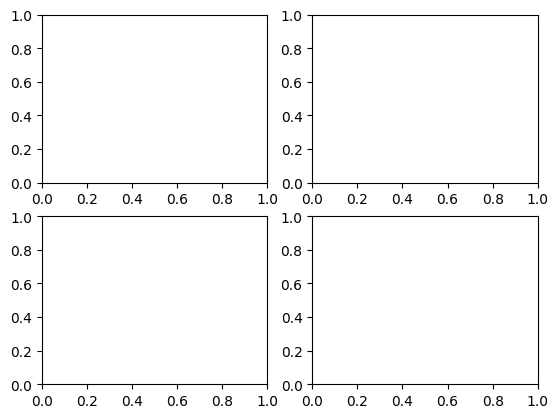

In [101]:
# Initialize fig and axes objects
fig, axes = plt.subplots(2, 2)  # Create 2x2 subplots

In [ ]:
print(axes)
print(axes[0, 0]) # Access upper left plot

[[<Axes: > <Axes: >]
 [<Axes: > <Axes: >]]
Axes(0.125,0.53;0.352273x0.35)


We can now **fill and modify each one of the axes (i.e.subplot) individually**, accessing them by row and column index (e.g. the upper left axis object can be accessed as ``axes[0, 0]``):

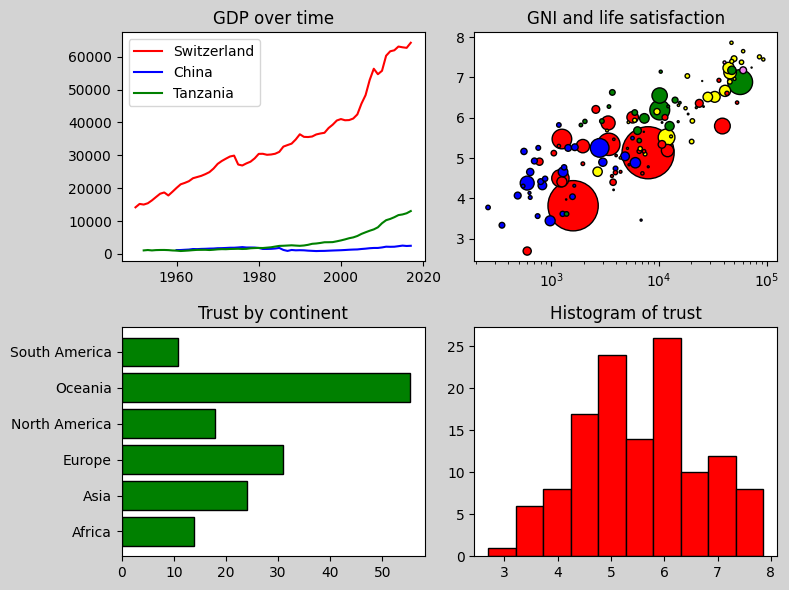

In [106]:
# Initialize fig and axes objects
fig, axes = plt.subplots(2, 2, figsize=(8, 6))  # Create 2x2 subplots

# Upper left plot
axes[0, 0].plot(che["year"], che["gdp_per_capita"], color="red")
axes[0, 0].plot(tza["year"], tza["gdp_per_capita"], color="blue")
axes[0, 0].plot(chn["year"], chn["gdp_per_capita"], color="green")
axes[0, 0].set_title("GDP over time")
axes[0, 0].legend(["Switzerland", "China", "Tanzania"])

# Upper right plot
axes[0, 1].scatter(satisfaction["gni_per_capita"],
                   satisfaction["life_satisfaction"],
                   marker="o",
                   edgecolor="black",
                   c=satisfaction["colors"],
                   s=satisfaction["population"]/1000000)
axes[0, 1].set_xscale("log")
axes[0, 1].set_title("GNI and life satisfaction")

# Lower left plot
axes[1, 0].barh(trust_agg.index, trust_agg["trust"],
                color="green",
                edgecolor="black")
axes[1, 0].set_title("Trust by continent")

# Lower right plot
axes[1, 1].hist(satisfaction["life_satisfaction"],
                color="red", edgecolor="black")
axes[1, 1].set_title("Histogram of trust")

# Finalize and show figure
fig.tight_layout()
fig.set_facecolor("lightgrey")
fig.show()

The object-oriented approach may take more time to get used to than the functional approach, but the investment will definitly start to pay off when you get to more complex plots! Moreover, much of the example code you will find on Stackoverflow is based on the object-oriented interface and may not work if you try to mix it with the functional interface.

If wou want to learn more about object-oriented plotting in matplotlib, see, for example:

* https://neuraldatascience.io/4-viz/proc_vs_oo.html
* https://matplotlib.org/matplotblog/posts/pyplot-vs-object-oriented-interface/




---


>  <font color='teal'> **In-class exercise**:
Consider the following code that uses the functional interface to create a scatter plot:

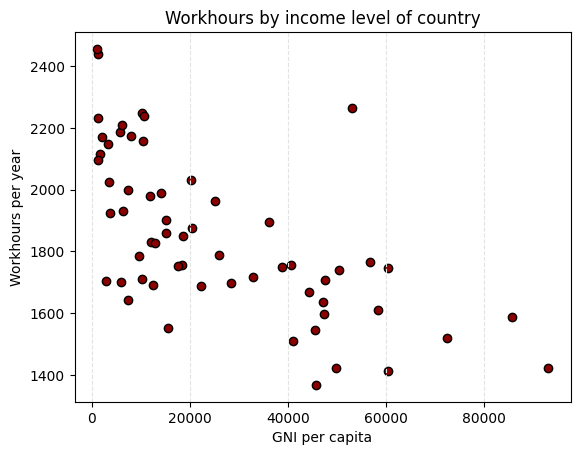

In [109]:
plt.scatter(satisfaction["gni_per_capita"],
            satisfaction["workhours"],
            edgecolor="black",
            color="darkred")

plt.grid(which="major",
         axis="x",
         linestyle="--",
         color="#e2e4e0")

plt.xlabel("GNI per capita")
plt.ylabel("Workhours per year")
plt.title("Workhours by income level of country")

plt.show()

>  <font color='teal'> Can you re-write the code above to create the same plot using an object-oriented approach?

>  <font color='teal'> Now, use ``plt.subplots()`` to create a figure with two scatter plots: workhours by GNI per capita on the left and life satisfaction by GNI per capita on the right. Make sure each subplot has an appropriate title (extra task: customize your plot to make it look nice).

In [110]:
# With customization


---

### Sidenote: Colorpalettes

**If time is left** we can have a quick look at color palettes. Consider the barh-example from the beginning:

Text(0.5, 0, 'Share of people who think others can be trusted')

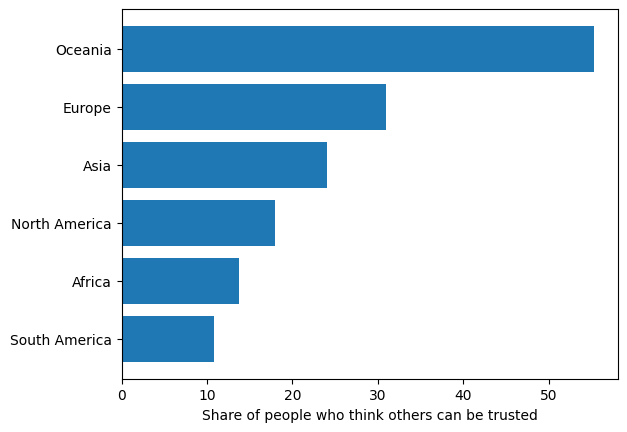

In [116]:
trust = pd.read_csv("http://farys.org/daten/trust_clean.csv",
                    index_col="country_code")

trust_agg = (trust.groupby("continent").mean(numeric_only=True)
             .sort_values(by="trust", ascending=True))

plt.barh(trust_agg.index, trust_agg["trust"])
plt.xlabel("Share of people who think others can be trusted")

You do not have to reinvent the wheel if you want to have nice colors. Within `matplotlib`, there are already plenty of options with `matplotlib.cm`. If you need even more options, the `palettable` module might be worth a look. Look up the documentation here: https://jiffyclub.github.io/palettable/

Let's, for example, use a color gradient for the `barh` example using `matplotlib.cm`:

Text(0.5, 0, 'Share of people who think others can be trusted')

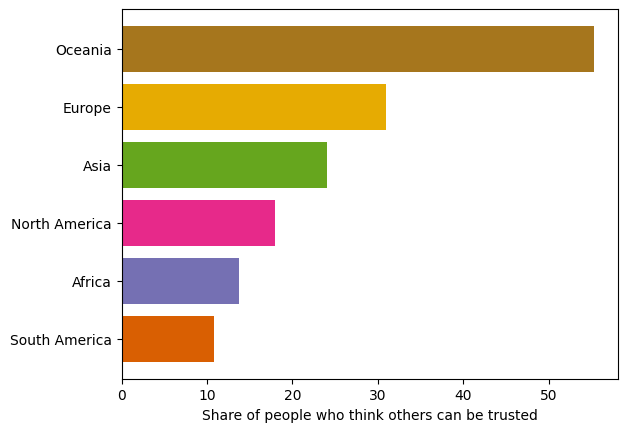

In [119]:
import matplotlib.cm as cm

# Create a sequential blues colormap with 6 colors
blues_palette = cm.Blues(np.linspace(0, 1, 6))
blues_palette = cm.Dark2(range(1, 7))
plt.barh(trust_agg.index, trust_agg["trust"], color=blues_palette)
plt.xlabel("Share of people who think others can be trusted")

Now, consider the example of the colorful bubble plot. Let's create an alternative color palette from the `palettable` module.

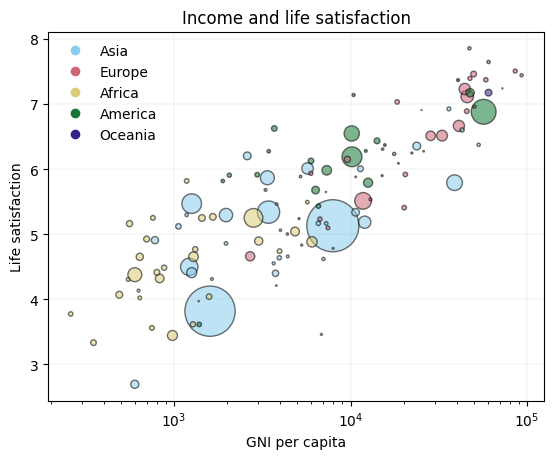

In [127]:
#!pip install palettable
import palettable

# Simplify to 5 continents
satisfaction["continent"].replace({"North America": "America",
                                   "South America": "America"},
                                  inplace=True)

# Create a color palette with 5 colors that is suitable for colorblind people
color_palette = palettable.cartocolors.qualitative.Safe_5.mpl_colors
# color_palette = palettable.colorbrewer.qualitative.Dark2_8.mpl_colors


# Create a color dictionary
continents = ["Asia", "Europe", "Africa", "America", "Oceania"]
color_dict = dict(zip(continents, color_palette))

# Use the map function the create a column with the colors
satisfaction["colors"] = satisfaction["continent"].map(color_dict)

# Initialize fig and ax objects
fig, ax = plt.subplots()

# fill ax with a scatter plot
ax.scatter(satisfaction["gni_per_capita"],
           satisfaction["life_satisfaction"],
           marker="o",
           edgecolor="black",
           c=satisfaction["colors"],
           s=satisfaction["population"]/1000000,
           alpha=0.55)

# Add a title
ax.set_title("Income and life satisfaction")

# Add axis labels
ax.set_ylabel("Life satisfaction")
ax.set_xlabel("GNI per capita")

# Log-scale for x axis
ax.set_xscale("log")

# Add grid
ax.grid(alpha=0.6, linewidth=0.2)

# Add legend
legend_elements = []
for key, value in color_dict.items():
    legend_elements.append(Line2D([0], [0], marker="o", color="white",
                                  markerfacecolor=value, markersize=8,
                                  label=key))
ax.legend(handles=legend_elements, frameon=False)

# Save and show figure
fig.savefig("myplot2.png")
fig.show()